# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Observations
# 1 Temperature max for this dataset follows ecpected paterns of being greater near the equator overall. Additonally, there the
#  data follows suite with showing a larger set of low max temps in the northern hempisphere because there are far more cities and
#  land mass in the northern hemisphere.
# 2 The humidity graph also follows closely with scientific understanding of ocean currents and land mass. The humidity generally trends up in the northern
#   hemisphere but tapers as it reaches the pole, as there is a higher concentration of reported cities naturally as mentioned above and 
#   more land mass that leads to more cases of humidity reported based on city volume.
# 3 Wind speed tends to be fairly consisent across the data but the spikes occur where speeds get really high near the poles
#   and in the hurricane/monsoon latitude ranges.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Start query url from openweather api weather info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [12]:
# create lists to store the data for the dataframe
City = []
Country = []
Lat = []
Lng = []
Date = []
Humidity = []
Cloudiness = []
Max_Temp = []
Windspeed = []

index = 0

# Loop through the cities list using the api and append the selected info to the lists
for city in cities:
    print(f"Retrieving Results for Index {index}: {city}.")
    try:
        response = requests.get(query_url + city).json()
        
        # get info for each list created above and append to the list
        City.append(city)
        Country.append(response['sys']['country'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Date.append(response['dt'])
        Humidity.append(response["main"]['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Max_Temp.append(response['main']['temp_max'])
        Windspeed.append(response['wind']['speed'])
        
    except:
        print(f"     Missing field/result for {city}. Skipping.")
    
    index=index+1 
#   Need a delay between api calls in order to not reach limit for free subscription
    time.sleep(7.8)

Retrieving Results for Index 0: ushuaia.
Retrieving Results for Index 1: kloulklubed.
Retrieving Results for Index 2: bubaque.
Retrieving Results for Index 3: soe.
Retrieving Results for Index 4: cape town.
Retrieving Results for Index 5: nabire.
Retrieving Results for Index 6: san cristobal.
Retrieving Results for Index 7: mataura.
Retrieving Results for Index 8: samarai.
Retrieving Results for Index 9: ambovombe.
Retrieving Results for Index 10: bredasdorp.
Retrieving Results for Index 11: port elizabeth.
Retrieving Results for Index 12: bima.
Retrieving Results for Index 13: port alfred.
Retrieving Results for Index 14: fort-shevchenko.
Retrieving Results for Index 15: kazalinsk.
     Missing field/result for kazalinsk. Skipping.
Retrieving Results for Index 16: ribeira grande.
Retrieving Results for Index 17: zhigansk.
Retrieving Results for Index 18: ilulissat.
Retrieving Results for Index 19: kapaa.
Retrieving Results for Index 20: camacha.
Retrieving Results for Index 21: cabo s

Retrieving Results for Index 165: lagoa.
Retrieving Results for Index 166: mehran.
Retrieving Results for Index 167: hermanus.
Retrieving Results for Index 168: palmer.
Retrieving Results for Index 169: rakoshyno.
Retrieving Results for Index 170: carnarvon.
Retrieving Results for Index 171: pekalongan.
Retrieving Results for Index 172: gobabis.
Retrieving Results for Index 173: aflu.
     Missing field/result for aflu. Skipping.
Retrieving Results for Index 174: lac du bonnet.
Retrieving Results for Index 175: sitka.
Retrieving Results for Index 176: ambon.
Retrieving Results for Index 177: namatanai.
Retrieving Results for Index 178: vanimo.
Retrieving Results for Index 179: chumikan.
Retrieving Results for Index 180: walvis bay.
Retrieving Results for Index 181: yenagoa.
Retrieving Results for Index 182: guerrero negro.
Retrieving Results for Index 183: birjand.
Retrieving Results for Index 184: slave lake.
Retrieving Results for Index 185: arlit.
Retrieving Results for Index 186: j

Retrieving Results for Index 333: svetlaya.
Retrieving Results for Index 334: selma.
Retrieving Results for Index 335: verkhnyaya inta.
Retrieving Results for Index 336: veraval.
Retrieving Results for Index 337: nome.
Retrieving Results for Index 338: mizpe ramon.
     Missing field/result for mizpe ramon. Skipping.
Retrieving Results for Index 339: ziro.
Retrieving Results for Index 340: road town.
Retrieving Results for Index 341: wenling.
Retrieving Results for Index 342: grindavik.
Retrieving Results for Index 343: ust-kulom.
Retrieving Results for Index 344: vostok.
Retrieving Results for Index 345: abonnema.
Retrieving Results for Index 346: cedral.
Retrieving Results for Index 347: trairi.
Retrieving Results for Index 348: saint-georges.
Retrieving Results for Index 349: sonamura.
Retrieving Results for Index 350: samusu.
     Missing field/result for samusu. Skipping.
Retrieving Results for Index 351: springdale.
Retrieving Results for Index 352: bystryy istok.
Retrieving Resu

Retrieving Results for Index 500: cabedelo.
Retrieving Results for Index 501: shintomi.
Retrieving Results for Index 502: antalaha.
Retrieving Results for Index 503: buchanan.
Retrieving Results for Index 504: faanui.
Retrieving Results for Index 505: sorong.
Retrieving Results for Index 506: haines junction.
Retrieving Results for Index 507: kigoma.
Retrieving Results for Index 508: porto novo.
Retrieving Results for Index 509: esik.
Retrieving Results for Index 510: marquette.
Retrieving Results for Index 511: chimbote.
Retrieving Results for Index 512: brownwood.
Retrieving Results for Index 513: zyryanka.
Retrieving Results for Index 514: gari.
Retrieving Results for Index 515: nizhnetroitskiy.
Retrieving Results for Index 516: santa isabel do rio negro.
Retrieving Results for Index 517: severomuysk.
Retrieving Results for Index 518: gangotri.
     Missing field/result for gangotri. Skipping.
Retrieving Results for Index 519: dzaoudzi.
Retrieving Results for Index 520: sangar.
Retr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Create a dataframe using the lists that have been populated by the api calls
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Windspeed    
}
# Received an error that some cities had missing data for certain weather parameter, used orient to still create a dataframe 
# that adds NaN values to the missing info by index
weather_data_df = pd.DataFrame.from_dict(weather_dict, orient='index').T
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,75,AR,1573254237,98,-54.81,-68.31,35.6,28.86
1,kloulklubed,90,PW,1573254283,94,7.04,134.26,75.2,9.17
2,bubaque,41,GW,1573254291,69,11.28,-15.83,84.02,13.35
3,soe,90,EE,1573254299,100,57.91,26.05,39.99,5.82
4,cape town,99,ZA,1573254208,63,-33.93,18.42,66,6.93


In [27]:
#Ensure there are no missing values in the the dataframe, dropna
weather_data_df = weather_data_df.dropna(how='any')
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,75,AR,1573254237,98,-54.81,-68.31,35.6,28.86
1,kloulklubed,90,PW,1573254283,94,7.04,134.26,75.2,9.17
2,bubaque,41,GW,1573254291,69,11.28,-15.83,84.02,13.35
3,soe,90,EE,1573254299,100,57.91,26.05,39.99,5.82
4,cape town,99,ZA,1573254208,63,-33.93,18.42,66,6.93


In [28]:
# Export the datframe to a csv
weather_data_df.to_csv('weather_data_bycity.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

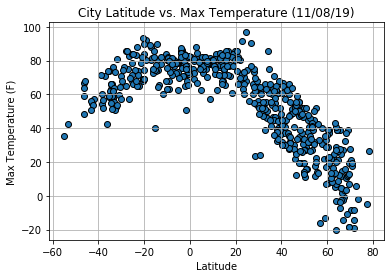

In [32]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (11/08/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_vs_maxtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

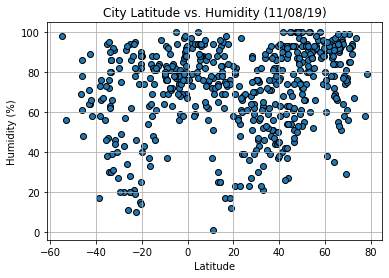

In [33]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (11/08/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

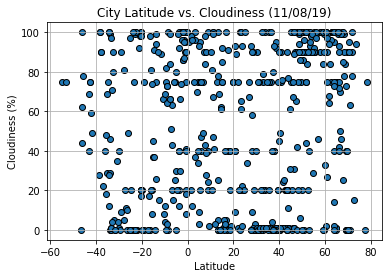

In [34]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (11/08/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

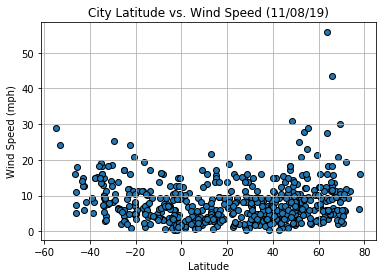

In [35]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (11/08/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_vs_windspeed.png")

# Show plot
plt.show()